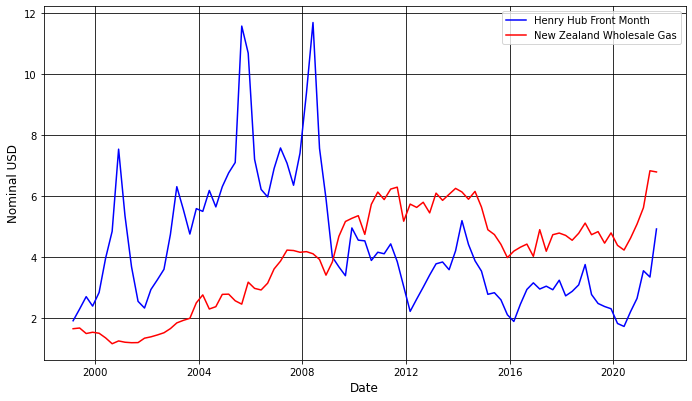

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df2 = df[(df['DATE'] >= '2009-3-1') & (df['DATE'] <= '2022-6-10')]

df3 = df[(df['DATE'] < '2009-3-1')]

fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
plt.plot(df['DATE'],df['HH'],color='blue')
plt.plot(df['DATE'],df['NZBTU_USD'],color='red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nominal USD', fontsize=12)
plt.legend(["Henry Hub Front Month", "New Zealand Wholesale Gas"], loc ="upper right")
plt.grid(color="black")

plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/}nz-us-gas.png', dpi=400)

                            OLS Regression Results                            
Dep. Variable:              NZBTU_USD   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.421
Date:                Tue, 08 Mar 2022   Prob (F-statistic):             0.0677
Time:                        14:51:20   Log-Likelihood:                -172.06
No. Observations:                  91   AIC:                             348.1
Df Residuals:                      89   BIC:                             353.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6082      0.390     11.825      0.0

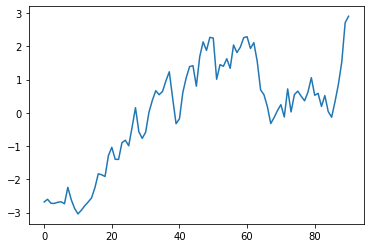

In [2]:
result1 = smf.ols(formula="NZBTU_USD ~ HH", data=df).fit()
print(result1.summary())
plt.plot(result1.resid)

In [ ]:
test = ts.adfuller(result1.resid,autolag="AIC")
print(test)

result = ts.coint(df['HH'],df['NZBTU_USD'])
print(result)

In [ ]:
test1 = ts.adfuller(df2['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df2['NZBTU_USD'],autolag="AIC")
print(test2)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df2['DATE'],df2['HH'],color='blue')
plt.plot(df2['DATE'],df2['NZBTU_USD'],color='red')
plt.grid(color="black")

In [ ]:
result2 = smf.ols(formula="NZBTU_USD ~ HH", data=df2).fit()
print(result2.summary())
plt.plot(df2["DATE"],result2.resid)


test = ts.adfuller(result2.resid,autolag="AIC")
print(test)

result = ts.coint(df2['HH'],df2['NZBTU_USD'])
print(result)

In [ ]:
result_switch = smf.ols(formula="HH ~ NZBTU_USD", data=df2).fit()
print(result_switch.summary())
plt.plot(df2["DATE"],result_switch.resid)

test = ts.adfuller(result.resid,autolag="AIC")
print(test)

(-2.761340895229836, 0.06401165199582652, 1, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 107.54197718905178)
(-1.9546506680800597, 0.3068040943605771, 4, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 6.018017903187705)


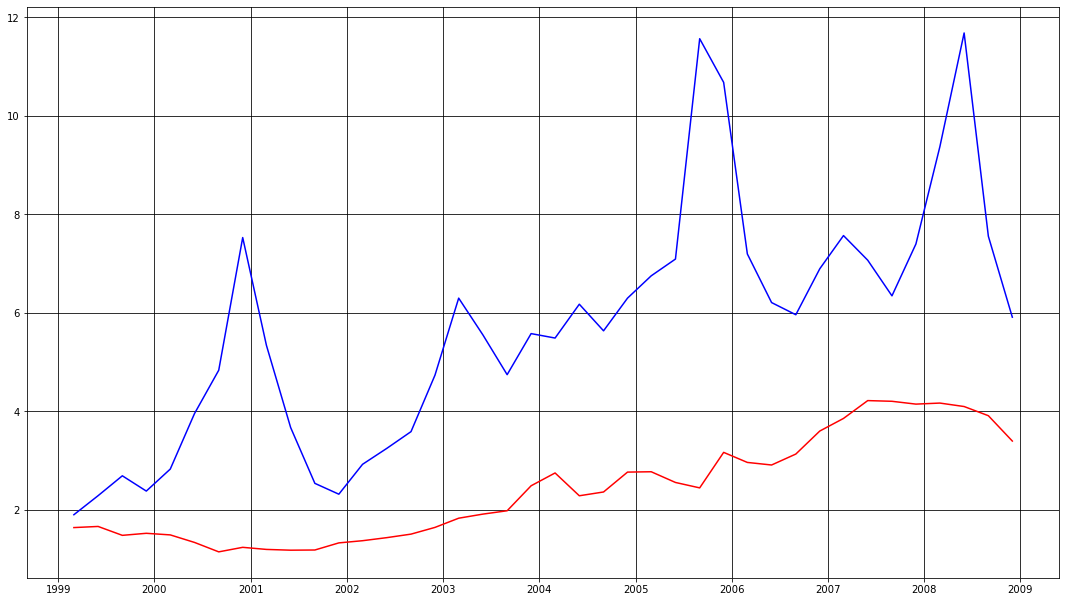

In [3]:
test1 = ts.adfuller(df3['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df3['NZBTU_USD'],autolag="AIC")
print(test2)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df3['DATE'],df3['HH'],color='blue')
plt.plot(df3['DATE'],df3['NZBTU_USD'],color='red')
plt.grid(color="black")

                            OLS Regression Results                            
Dep. Variable:              NZBTU_USD   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     36.07
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           5.59e-07
Time:                        14:51:55   Log-Likelihood:                -44.309
No. Observations:                  40   AIC:                             92.62
Df Residuals:                      38   BIC:                             96.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7355      0.303      2.427      0.0

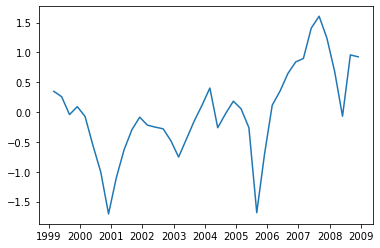

In [4]:
result3 = smf.ols(formula="NZBTU_USD ~ HH", data=df3).fit()
print(result3.summary())
plt.plot(df3["DATE"],result3.resid)

test = ts.adfuller(result3.resid,autolag="AIC")
print(test)

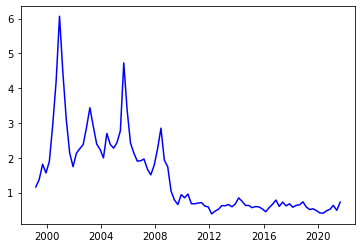

In [5]:
df['ratio'] = df["HH"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [6]:
mod = sm.tsa.MarkovRegression(df['ratio'].iloc[1:], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   90
Model:               MarkovRegression   Log Likelihood                 -28.275
Date:                Tue, 08 Mar 2022   AIC                             68.550
Time:                        14:54:42   BIC                             83.549
Sample:                             0   HQIC                            74.598
                                 - 90                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6256      0.018     35.016      0.000       0.591       0.661
sigma2         0.0156      0.003      4.801      0.000       0.009       0.022
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4927      0.155     16.108      0.000       2.189       2.796
sigma2         0.9470      0.212      4.458      0.000       0.531       1.363
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9893      0.013     77.357      0.000       0.964       1.014
p[1->0]        0.0120      0.015      0.804      0.421      -0.017       0.041
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<AxesSubplot:title={'center':'Probability of being in high price/volatility regime'}>

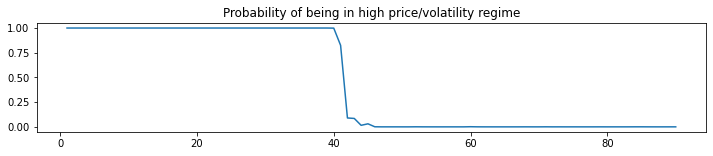

In [7]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price/volatility regime', figsize=(12,2))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Dropbox/PhD/Writing/TeX/Charts/nzbtu.png'

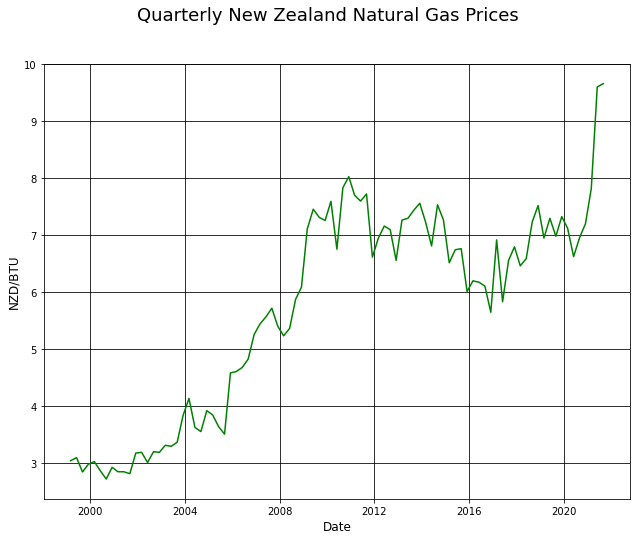

In [8]:
fig = plt.gcf()
fig.set_size_inches(10.5, 8)
plt.plot(df['DATE'],df['NZ_BTU'],color='green')
fig.suptitle('Quarterly New Zealand Natural Gas Prices',fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NZD/BTU', fontsize=12)
plt.grid(color="black")

plt.savefig('C:/Users/User/Dropbox/PhD/Writing/TeX/Charts/nzbtu.png', dpi=400)

In [ ]:
star = Stargazer([result1,result2,result3])
print(star.render_latex())